In [1]:
%matplotlib inline

In [2]:
import os
import pandas as pd
from zipline.data import bundles
from zipline.data.data_portal import DataPortal
from zipline.utils.calendars import get_calendar
from zipline.assets._assets import Future
from zipline.utils.run_algo import load_extensions

# Load extensions.py; this allows you access to custom bundles
load_extensions(
    default=True,
    extensions=[],
    strict=True,
    environ=os.environ,
)

# Set-Up Pricing Data Access
trading_calendar = get_calendar('NYSE')
bundle = 'futures'
bundle_data = bundles.load(bundle)

data = DataPortal(
    bundle_data.asset_finder,
    trading_calendar=trading_calendar,
    first_trading_day=bundle_data.equity_daily_bar_reader.first_trading_day,
    equity_minute_reader=None,
    equity_daily_reader=bundle_data.equity_daily_bar_reader,
    future_daily_reader=bundle_data.equity_daily_bar_reader,
    adjustment_reader=bundle_data.adjustment_reader,
)

fut = bundle_data.asset_finder.retrieve_futures_contracts([0])[0]

end_dt = pd.Timestamp('2018-01-05', tz='UTC', offset='C')
start_dt = pd.Timestamp('2018-01-02', tz='UTC', offset='C')
    
end_loc = trading_calendar.closes.index.get_loc(end_dt)

C:\Users\tomek\zipline\extensions.py:15: UserWarning: Overwriting bundle with name 'futures'
  calendar_name='NYSE',


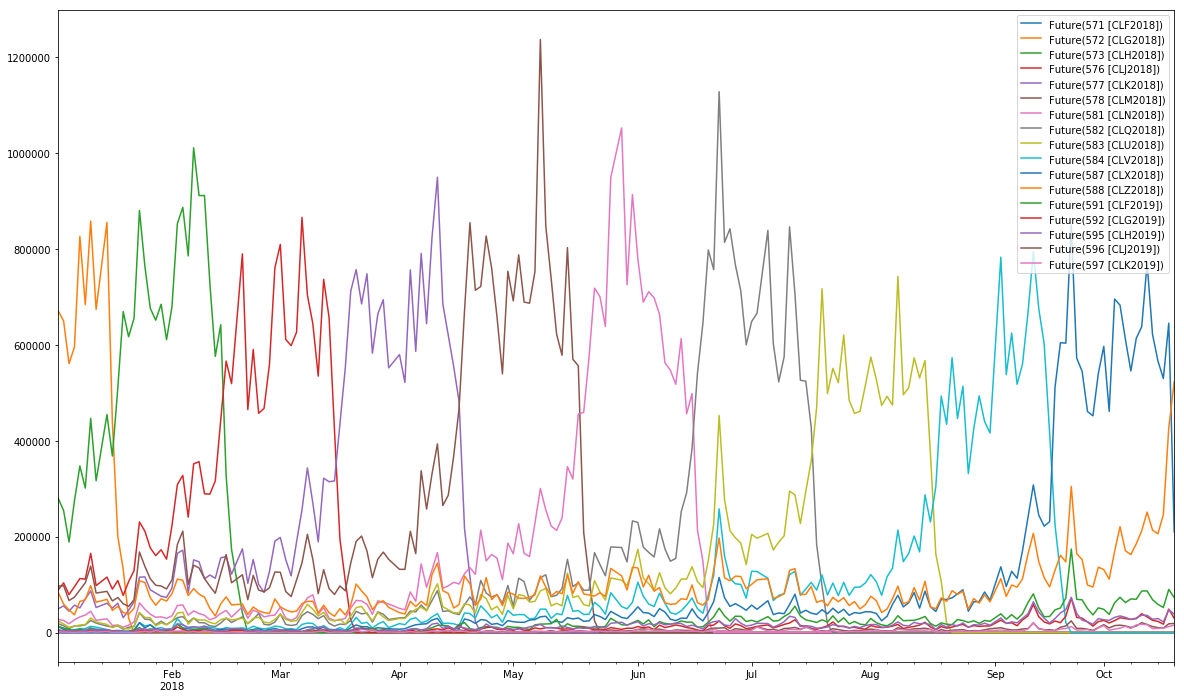

In [3]:
continuous_future = bundle_data.asset_finder.create_continuous_future
history = data.get_history_window

cl_contracts = [
    bundle_data.asset_finder.lookup_future_symbol(x) 
    for x
    in ['CLF2018', 'CLG2018', 'CLH2018', 'CLJ2018', 'CLK2018', 'CLM2018', 'CLN2018', 'CLQ2018', 'CLU2018', 'CLV2018', 
        'CLX2018', 'CLZ2018', 'CLF2019', 'CLG2019', 'CLH2019', 'CLJ2019', 'CLK2019']
]

start_dt = pd.Timestamp('2018-1-2', tz='UTC', offset='C')
end_dt = pd.Timestamp('2018-10-18', tz='UTC', offset='C')

end_loc = trading_calendar.closes.index.get_loc(end_dt)
start_loc = trading_calendar.closes.index.get_loc(start_dt)    
    
cl_consecutive_contract_volume = history(
    assets=cl_contracts,
    end_dt=end_dt,
    bar_count=end_loc - start_loc,
    frequency='1d',
    field='volume',
    data_frequency='daily'
)

cl_consecutive_contract_volume.plot(figsize=(20,12));

In [4]:
volume = history(
    assets=cl_contracts,
    end_dt=pd.Timestamp('2018-05-31'),
    bar_count=30,
    frequency='1d',
    field='volume',
    data_frequency='daily'
)

In [5]:
volume[Future(581, 'CME')]

2018-04-19 00:00:00+00:00     135478.0
2018-04-20 00:00:00+00:00     121354.0
2018-04-23 00:00:00+00:00     213439.0
2018-04-24 00:00:00+00:00     149469.0
2018-04-25 00:00:00+00:00     162809.0
2018-04-26 00:00:00+00:00     155181.0
2018-04-27 00:00:00+00:00     110332.0
2018-04-30 00:00:00+00:00     186566.0
2018-05-01 00:00:00+00:00     164300.0
2018-05-02 00:00:00+00:00     227136.0
2018-05-03 00:00:00+00:00     164843.0
2018-05-04 00:00:00+00:00     158580.0
2018-05-07 00:00:00+00:00     227935.0
2018-05-08 00:00:00+00:00     300511.0
2018-05-09 00:00:00+00:00     255916.0
2018-05-10 00:00:00+00:00     222124.0
2018-05-11 00:00:00+00:00     213115.0
2018-05-14 00:00:00+00:00     238986.0
2018-05-15 00:00:00+00:00     345899.0
2018-05-16 00:00:00+00:00     320041.0
2018-05-17 00:00:00+00:00     455662.0
2018-05-18 00:00:00+00:00     459157.0
2018-05-21 00:00:00+00:00     575755.0
2018-05-22 00:00:00+00:00     718236.0
2018-05-23 00:00:00+00:00     700325.0
2018-05-24 00:00:00+00:00

In [6]:
continuous_future('CL', 0, 'volume', 'add')

ContinuousFuture(90999980378161152, root_symbol='CL', offset=0, roll_style='volume', adjustment='add')

In [7]:
start_loc = trading_calendar.closes.index.get_loc(start_dt)    
    
dat = data.get_history_window(
    assets=[fut],
    end_dt=end_dt,
    bar_count=end_loc - start_loc,
    frequency='1d',
    field='close',
    data_frequency='daily'
)

In [8]:
dat

,Future(0 [CLM1983])
2018-01-03 00:00:00+00:00,NaN
2018-01-04 00:00:00+00:00,NaN
2018-01-05 00:00:00+00:00,NaN
2018-01-08 00:00:00+00:00,NaN
2018-01-09 00:00:00+00:00,NaN
2018-01-10 00:00:00+00:00,NaN
2018-01-11 00:00:00+00:00,NaN
2018-01-12 00:00:00+00:00,NaN
2018-01-16 00:00:00+00:00,NaN
2018-01-17 00:00:00+00:00,NaN


In [9]:
clf17_sid = bundle_data.asset_finder.lookup_future_symbol('CLF2017').sid
start_dt = pd.Timestamp('2017-10-1', tz='UTC', offset='C')
cl = continuous_future('CL', offset=0, roll_style='calendar', adjustment='mul')
oc = bundle_data.asset_finder.get_ordered_contracts('CL')
chain = oc.active_chain(clf17_sid, start_dt.value)
all_chain = bundle_data.asset_finder.retrieve_all(chain)
all_chain

[Future(551 [CLF2017]),
 Future(552 [CLG2017]),
 Future(553 [CLH2017]),
 Future(556 [CLJ2017]),
 Future(557 [CLK2017]),
 Future(558 [CLM2017]),
 Future(561 [CLN2017]),
 Future(562 [CLQ2017]),
 Future(563 [CLU2017]),
 Future(566 [CLV2017]),
 Future(567 [CLX2017]),
 Future(568 [CLZ2017]),
 Future(571 [CLF2018]),
 Future(572 [CLG2018]),
 Future(573 [CLH2018]),
 Future(576 [CLJ2018]),
 Future(577 [CLK2018]),
 Future(578 [CLM2018]),
 Future(581 [CLN2018]),
 Future(582 [CLQ2018]),
 Future(583 [CLU2018]),
 Future(584 [CLV2018]),
 Future(587 [CLX2018]),
 Future(588 [CLZ2018]),
 Future(591 [CLF2019]),
 Future(592 [CLG2019]),
 Future(595 [CLH2019]),
 Future(596 [CLJ2019]),
 Future(597 [CLK2019]),
 Future(599 [CLM2019]),
 Future(601 [CLN2019]),
 Future(602 [CLQ2019]),
 Future(605 [CLU2019]),
 Future(606 [CLV2019]),
 Future(607 [CLX2019]),
 Future(610 [CLZ2019]),
 Future(611 [CLF2020]),
 Future(612 [CLG2020]),
 Future(613 [CLH2020]),
 Future(614 [CLJ2020]),
 Future(615 [CLK2020]),
 Future(616 [CLM

In [10]:
all_chain[1].to_dict()

{'asset_name': '',
 'auto_close_date': Timestamp('2017-01-18 00:00:00+0000', tz='UTC'),
 'end_date': Timestamp('2017-01-20 00:00:00+0000', tz='UTC'),
 'exchange': 'NYMEX',
 'exchange_full': 'NYMEX',
 'expiration_date': Timestamp('2017-01-20 00:00:00+0000', tz='UTC'),
 'first_traded': Timestamp('2011-11-18 00:00:00+0000', tz='UTC'),
 'multiplier': 1000.0,
 'notice_date': Timestamp('2017-01-18 00:00:00+0000', tz='UTC'),
 'root_symbol': 'CL',
 'sid': 552,
 'start_date': Timestamp('2011-11-18 00:00:00+0000', tz='UTC'),
 'symbol': 'CLG2017',
 'tick_size': 0.01}

In [11]:
cl = continuous_future('CL', offset=0, roll_style='volume', adjustment='add')

In [12]:
cl

ContinuousFuture(90999980378161152, root_symbol='CL', offset=0, roll_style='volume', adjustment='add')

In [13]:
oc = bundle_data.asset_finder.get_ordered_contracts('CL')
chain = oc.active_chain(clf17_sid, start_dt.value)
all_chain = bundle_data.asset_finder.retrieve_all(chain)
all_chain

[Future(551 [CLF2017]),
 Future(552 [CLG2017]),
 Future(553 [CLH2017]),
 Future(556 [CLJ2017]),
 Future(557 [CLK2017]),
 Future(558 [CLM2017]),
 Future(561 [CLN2017]),
 Future(562 [CLQ2017]),
 Future(563 [CLU2017]),
 Future(566 [CLV2017]),
 Future(567 [CLX2017]),
 Future(568 [CLZ2017]),
 Future(571 [CLF2018]),
 Future(572 [CLG2018]),
 Future(573 [CLH2018]),
 Future(576 [CLJ2018]),
 Future(577 [CLK2018]),
 Future(578 [CLM2018]),
 Future(581 [CLN2018]),
 Future(582 [CLQ2018]),
 Future(583 [CLU2018]),
 Future(584 [CLV2018]),
 Future(587 [CLX2018]),
 Future(588 [CLZ2018]),
 Future(591 [CLF2019]),
 Future(592 [CLG2019]),
 Future(595 [CLH2019]),
 Future(596 [CLJ2019]),
 Future(597 [CLK2019]),
 Future(599 [CLM2019]),
 Future(601 [CLN2019]),
 Future(602 [CLQ2019]),
 Future(605 [CLU2019]),
 Future(606 [CLV2019]),
 Future(607 [CLX2019]),
 Future(610 [CLZ2019]),
 Future(611 [CLF2020]),
 Future(612 [CLG2020]),
 Future(613 [CLH2020]),
 Future(614 [CLJ2020]),
 Future(615 [CLK2020]),
 Future(616 [CLM

In [14]:
all_chain[2].to_dict()

{'asset_name': '',
 'auto_close_date': Timestamp('2017-02-19 00:00:00+0000', tz='UTC'),
 'end_date': Timestamp('2017-02-21 00:00:00+0000', tz='UTC'),
 'exchange': 'NYMEX',
 'exchange_full': 'NYMEX',
 'expiration_date': Timestamp('2017-02-21 00:00:00+0000', tz='UTC'),
 'first_traded': Timestamp('2011-11-18 00:00:00+0000', tz='UTC'),
 'multiplier': 1000.0,
 'notice_date': Timestamp('2017-02-19 00:00:00+0000', tz='UTC'),
 'root_symbol': 'CL',
 'sid': 553,
 'start_date': Timestamp('2011-11-18 00:00:00+0000', tz='UTC'),
 'symbol': 'CLH2017',
 'tick_size': 0.01}

In [15]:
all_chain[3].to_dict()

{'asset_name': '',
 'auto_close_date': Timestamp('2017-03-19 00:00:00+0000', tz='UTC'),
 'end_date': Timestamp('2017-03-21 00:00:00+0000', tz='UTC'),
 'exchange': 'NYMEX',
 'exchange_full': 'NYMEX',
 'expiration_date': Timestamp('2017-03-21 00:00:00+0000', tz='UTC'),
 'first_traded': Timestamp('2011-11-18 00:00:00+0000', tz='UTC'),
 'multiplier': 1000.0,
 'notice_date': Timestamp('2017-03-19 00:00:00+0000', tz='UTC'),
 'root_symbol': 'CL',
 'sid': 556,
 'start_date': Timestamp('2011-11-18 00:00:00+0000', tz='UTC'),
 'symbol': 'CLJ2017',
 'tick_size': 0.01}

In [16]:
cf = history(
    assets=[cl],
    end_dt=pd.Timestamp('2018-05-31'),
    bar_count=100,
    frequency='1d',
    field='sid',
    data_frequency='daily'
)

In [17]:
cf.columns=['contract']

In [18]:
contracts = cf['contract'].apply(lambda x: bundle_data.asset_finder.retrieve_asset(x))

In [19]:
contracts

2018-01-08 00:00:00+00:00    Future(572 [CLG2018])
2018-01-09 00:00:00+00:00    Future(572 [CLG2018])
2018-01-10 00:00:00+00:00    Future(572 [CLG2018])
2018-01-11 00:00:00+00:00    Future(572 [CLG2018])
2018-01-12 00:00:00+00:00    Future(572 [CLG2018])
2018-01-16 00:00:00+00:00    Future(572 [CLG2018])
2018-01-17 00:00:00+00:00    Future(572 [CLG2018])
2018-01-18 00:00:00+00:00    Future(572 [CLG2018])
2018-01-19 00:00:00+00:00    Future(573 [CLH2018])
2018-01-22 00:00:00+00:00    Future(573 [CLH2018])
2018-01-23 00:00:00+00:00    Future(573 [CLH2018])
2018-01-24 00:00:00+00:00    Future(573 [CLH2018])
2018-01-25 00:00:00+00:00    Future(573 [CLH2018])
2018-01-26 00:00:00+00:00    Future(573 [CLH2018])
2018-01-29 00:00:00+00:00    Future(573 [CLH2018])
2018-01-30 00:00:00+00:00    Future(573 [CLH2018])
2018-01-31 00:00:00+00:00    Future(573 [CLH2018])
2018-02-01 00:00:00+00:00    Future(573 [CLH2018])
2018-02-02 00:00:00+00:00    Future(573 [CLH2018])
2018-02-05 00:00:00+00:00    Fu

In [20]:
cf = history(
    assets=[cl],
    end_dt=pd.Timestamp('2018-05-31'),
    bar_count=100,
    frequency='1d',
    field='volume',
    data_frequency='daily'
)

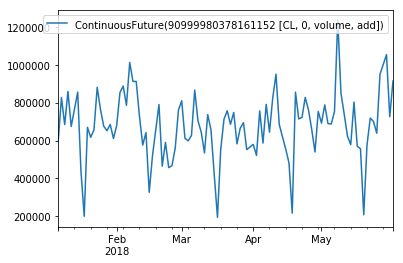

In [21]:
cf.plot()